# Data Insight

### Targeting high value customers based on customer demographics and attributes.

**Background Information Of The Task**

Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. But the marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.



**Here Is The Task**

For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour.
 
So, with the use of the existing three(3) datasets (Customer demographic, customer address and transactions) as a labelled dataset, we are tasked with recommending which of these 1000 new customers should be targeted to drive the most value for the organisation.

In building this recommendation, the client has agreed on a three week scope with the following three phases as follows:
**-Data Exploration**,
**-Model Development**,
**-Interpretation**,


I will be preparing a detailed approach for completing the analysis including activities – i.e. **understanding
the data distributions**, **feature engineering**, **data transformations**, **modelling**, **results interpretation** and **reporting**.

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.ticker as mtick 
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')

#  Reading In All The Necessary Data's As A Dataframe

In [2]:
transactions = pd.read_csv(xlskpmg_transactions.csv')
new_cust = pd.read_csv(r'C:\Users\USER\Documents\Dataset\kpmg_new_customers.csv')
cust_demographics = pd.read_csv(r'C:\Users\USER\Documents\Dataset\kpmg_customer_demographic.csv')
cust_address = pd.read_csv(r'C:\Users\USER\Documents\Dataset\kpmg_customer_address.csv')

### Setting The Display Option To Visualize All Rows

In [3]:
pd.set_option('display.max_columns', None)

## Merging Customer Demographic and Customer Address  Dataset

To get proper insight into our data for a proper analysis, We would be merging the three datasets; Customer demographic, 
Customer address and transactions.

We would be merging all datasets based on our transaction dataset, this is because majority of our analysis on our existing customers would be made based on their transactions with the company. So, based on this, our analysis would be based on only existing Customers who have made bicycle purchases from the company. As it is only through this way we can derive useful customer insights which could help optimise resource allocation for targeted marketing. Customers without any transaction are quite insignificant in meeting any of our analytical aims.

In [4]:
one = pd.merge(transactions, cust_demographics, on='customer_id',how='left')

kpmg = pd.merge(one, cust_address, on='customer_id',how='left')

### Details Of New Dataset

In [5]:
kpmg.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,No,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02,Kristos,Anthony,Male,19.0,1955-01-11,62.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,Yes,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03,Lauree,O'Donnell,Female,89.0,1979-02-04,38.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,2017-10-16,No,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,1999-07-20,Berne,Donegan,Male,9.0,1977-06-03,40.0,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,2017-08-31,No,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,1998-12-16,Titus,Worsall,Male,83.0,1962-01-14,55.0,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,5,78,787,2017-10-01,Yes,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,2015-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0601 Stephen Place,2292.0,NSW,Australia,7.0


In [6]:
kpmg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19273 entries, 0 to 19272
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19273 non-null  int64  
 1   product_id                           19273 non-null  int64  
 2   customer_id                          19273 non-null  int64  
 3   transaction_date                     19273 non-null  object 
 4   online_order                         19273 non-null  object 
 5   order_status                         19273 non-null  object 
 6   brand                                19273 non-null  object 
 7   product_line                         19273 non-null  object 
 8   product_class                        19273 non-null  object 
 9   product_size                         19273 non-null  object 
 10  list_price                           19273 non-null  float64
 11  standard_cost               

In [7]:
print(f'Present in this dataset are {kpmg.shape[0]} rows and {kpmg.shape[1]} columns of data in our dataset.')

Present in this dataset are 19273 rows and 31 columns of data in our dataset.


# Data Cleaning

##  Missing Values

In [8]:
null = kpmg.isnull().sum()[kpmg.isnull().sum() > 0]
null = null.reset_index()
null['no_rows'] = kpmg.shape[0]
null = null.rename(columns={'index':'column_names', 0:'num_of_null_values'})
null['percent_of_no_null_values'] = null['num_of_null_values'].apply(lambda x: (x/kpmg.shape[0])*100)
null = null.sort_values('percent_of_no_null_values', ascending = False).reset_index(drop = True)
null

,column_names,num_of_null_values,no_rows,percent_of_no_null_values
0,first_name,5773,19273,29.953821
1,job_industry_category,5773,19273,29.953821
2,tenure,5773,19273,29.953821
3,owns_car,5773,19273,29.953821
4,deceased_indicator,5773,19273,29.953821
5,last_name,5773,19273,29.953821
6,wealth_segment,5773,19273,29.953821
7,job_title,5773,19273,29.953821
8,age,5773,19273,29.953821
9,DOB,5773,19273,29.953821


### Dropping all null values

In [9]:
kpmg.dropna(inplace=True)

### Rechecking our dataset for number of rows and columns

In [10]:
print(f'After dropping all null values, present here in our data are {kpmg.shape[0]} rows and {kpmg.shape[1]} columns')

After dropping all null values, present here in our data are 13488 rows and 31 columns


### Rechecking for Null values

In [11]:
kpmg.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
profit                                 0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car        

### Name Of Columns In The Dataset

In [12]:
kpmg.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'profit', 'product_first_sold_date', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'age',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

# Data Transformation

## Creating a full name column from our first name and last name columns

In [13]:
kpmg['full_name'] = kpmg['first_name'] + ' ' + kpmg['last_name']

#### Selecting just the necessary columns for our dataset

In [14]:
kpmg = kpmg[['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'profit', 'full_name',
       'gender', 'past_3_years_bike_related_purchases', 'age',
       'job_title', 'job_industry_category', 'wealth_segment',
       'owns_car','state', 'property_valuation']]

## Classifying past_3_years_bike_related_purchases into segments 

In [15]:
bin_1 = [-1, 19, 39, 59, 79, 99]

related_purchases = kpmg['past_3_years_bike_related_purchases']

bike_related_purchases = pd.cut(related_purchases, bin_1)

past_3_yearspurchasing_power = ['Very Weak','Weak', 'Average', 'Strong', 'Excellent']

bike_related_purchases = pd.cut(related_purchases, bin_1, labels=past_3_yearspurchasing_power)

### Inserting The Created Segment As A New Column In Our Dataset

In [16]:
kpmg.insert(15,'3_years_bike_related_purchases_strength', bike_related_purchases)

# Classifying age into segments

### Changing the age datatype

In [17]:
kpmg['age'].dtype #Checking the data type

dtype('float64')

In [18]:
kpmg['age'] = kpmg['age'].astype(int)  #Changing the data type

In [19]:
bin_2 = [9, 24, 40, 56, 66, 75, 93]

generations = kpmg['age']

age_generations = pd.cut(generations, bin_2)

age_generations_stage = ['Gen Z', 'Millenials', 'Gen X', 'Boomers II', 'Boomers I', 'Post War']

age_generations = pd.cut(generations,bin_2, labels= age_generations_stage)

### Inserting The Created Segment As A New Column In Our Dataset

In [20]:
kpmg.insert(17,'age_generations', age_generations)

# Creating a Month Column

In [21]:
#changing the transaction date column into a datetime datatype

kpmg['transaction_date'] = pd.to_datetime(kpmg['transaction_date'])  

In [22]:
month = kpmg['transaction_date'].dt.month  
kpmg.insert(4, 'month', month)

In [23]:
#Changing the month column from numbers to month abbreviations

kpmg['month'] = kpmg['month'].apply(lambda x: calendar.month_abbr[x])

In [24]:
kpmg.head()

,transaction_id,product_id,customer_id,transaction_date,month,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,profit,full_name,gender,past_3_years_bike_related_purchases,3_years_bike_related_purchases_strength,age,age_generations,job_title,job_industry_category,wealth_segment,owns_car,state,property_valuation
0,1,2,2950,2017-02-25,Feb,No,Solex,Standard,medium,medium,71.49,53.62,17.87,Kristos Anthony,Male,19.0,Very Weak,62,Boomers II,Software Engineer I,Financial Services,Mass Customer,Yes,VIC,6.0
1,2,3,3120,2017-05-21,May,Yes,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,Lauree O'Donnell,Female,89.0,Excellent,38,Millenials,Clinical Specialist,Health,Mass Customer,Yes,NSW,5.0
2,3,37,402,2017-10-16,Oct,No,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,Berne Donegan,Male,9.0,Very Weak,40,Millenials,Desktop Support Technician,Retail,Affluent Customer,No,NSW,1.0
3,4,88,3135,2017-08-31,Aug,No,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,Titus Worsall,Male,83.0,Excellent,55,Gen X,Staff Scientist,Financial Services,Mass Customer,No,NSW,10.0
5,6,25,2339,2017-03-08,Mar,Yes,Giant Bicycles,Road,medium,medium,1538.99,829.65,709.34,Damien Haddeston,Male,3.0,Very Weak,59,Boomers II,Web Designer II,Property,Affluent Customer,Yes,NSW,10.0


# Data Exploration

#  Bicycle Purchases and Profit By States

In [25]:
state_purchases = kpmg[['transaction_id', 'profit']].groupby(kpmg['state']).agg({'transaction_id':'count',
                                                              'profit': 'sum'}).reset_index()
state_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
state_purchases=state_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
state_purchases['percent_of_purchase'] = state_purchases.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)
state_purchases['percent_of_profit'] = state_purchases.profit.apply(lambda x: (x/kpmg['profit'].sum())*100)

state_purchases

,state,No_of_purchases,profit,percent_of_purchase,percent_of_profit
0,NSW,7129,3916949.98,52.854389,52.637300
1,VIC,3382,1881184.60,25.074140,25.279995
2,QLD,2977,1643261.57,22.071471,22.082705


##  A Bar Chart On States Purchases And Profit

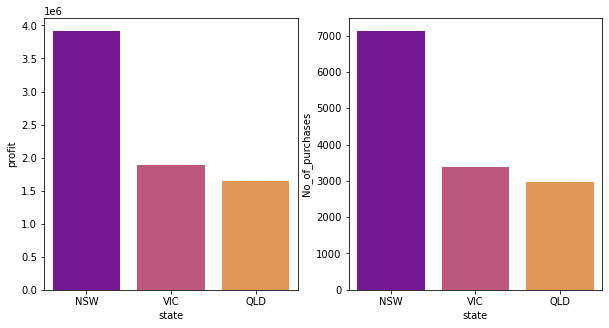

In [26]:


fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(x='state',y='profit',data=state_purchases,ci=95,ax=ax[0],
           order = state_purchases.sort_values('No_of_purchases',  ascending = False).state, palette = 'plasma')
sns.barplot(x='state',y='No_of_purchases',data=state_purchases,ci=95,ax=ax[1],
           order = state_purchases.sort_values('No_of_purchases',  ascending = False).state, palette = 'plasma')


plt.savefig('state_purchases_and_profit.png')

plt.show()

From the insight derived from the data and visualization above, we can conclude that **New South Wales(NSW)**  is the state that accounts for the most Bicycle purchases and also gives the company more profit.
Above **50 percent** of the company sales and profit comes from the state **New South Wales(NSW)**

#  Job Industry Purchases

In [27]:
industry_purchases = kpmg['transaction_id'].groupby(kpmg['job_industry_category']).count().reset_index()
industry_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
industry_purchases=industry_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
#industry_purchases['percent'] = industry_purchases.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)
industry_purchases['percent_of_purchases'] = (industry_purchases.No_of_purchases/kpmg.shape[0])*100

industry_purchases

,job_industry_category,No_of_purchases,percent_of_purchases
0,Manufacturing,3286,24.362396
1,Financial Services,3203,23.747034
2,Health,2616,19.395018
3,Retail,1404,10.409253
4,Property,1072,7.947805
5,Entertainment,578,4.285291
6,IT,568,4.211151
7,Argiculture,478,3.543891
8,Telecommunications,283,2.098161


## A Bar Chart On Purchases By Job Industry

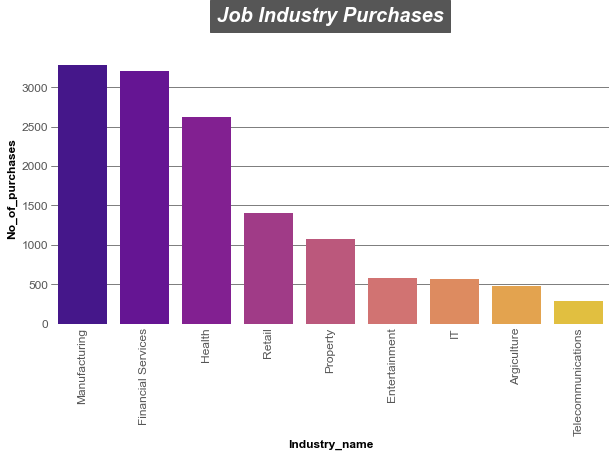

In [28]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='job_industry_category',y='No_of_purchases',data=industry_purchases,ci=95,ax=ax,
           order = industry_purchases.sort_values('No_of_purchases',  ascending = False).job_industry_category, palette = 'plasma')
ax.set_title('Job Industry Purchases',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

sns.set(context='notebook', style='ticks',palette='inferno')

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('Industry_name',weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=90,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.savefig('job_industry_purchases.png')

plt.show()

Three job industries together accounts for over **65 percent** of the company's sales; with **Manufacturing, Financial Services, and Health** having approximately **24.36, 23.74, 19.39 percent** respectively.	

## Purchases Based On Gender

In [29]:
gender_purchases = kpmg[['transaction_id', 'profit']].groupby(kpmg['gender']).agg({'transaction_id':'count',
                                                              'profit': 'sum'}).reset_index()
gender_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
gender_purchases=gender_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
gender_purchases['percent_of_purchases'] = gender_purchases.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)

gender_purchases

,gender,No_of_purchases,profit,percent_of_purchases
0,Female,6886,3762018.36,51.052788
1,Male,6602,3679377.79,48.947212


## A Bar Chart On Purchases By Gender

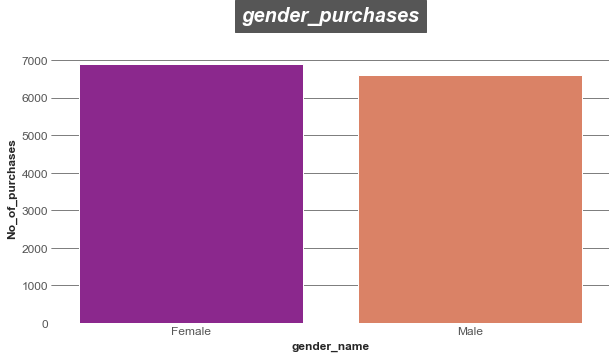

In [30]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='gender',y='No_of_purchases',data=gender_purchases,ci=95,ax=ax,
           order = gender_purchases.sort_values('No_of_purchases',  ascending = False).gender, palette = 'plasma')
ax.set_title('gender_purchases',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('gender_name',weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.savefig('gender_purchases.png')

plt.show()

Based on all transactions under the year of review we can see that females purchased more Bicyles than the males, with about **51.05 percent** of the purchases under the year of review made by females While the males have about **48.94 percent**

## How Many Unique Female And Male Customers Purchased a Bicycle

In [31]:
females=kpmg[kpmg['gender'] == 'Female'] 
males=kpmg[kpmg['gender'] != 'Female']

In [32]:
print(f'{females.full_name.nunique()} distinct female customers completed their transactions for the purchase of a bicycle with the company,\nwhile {males.full_name.nunique()} distinct male customers also purchased a bicycle.\nThat is, we can conclude that we had more female customers who purchased a bicycle than the males.')

1248 distinct female customers completed their transactions for the purchase of a bicycle with the company,
while 1195 distinct male customers also purchased a bicycle.
That is, we can conclude that we had more female customers who purchased a bicycle than the males.


## Brand Of Bicycle Purchased By Female Customers

In [33]:
females['brand'].value_counts()

Solex             1509
WeareA2B          1140
Giant Bicycles    1134
Trek Bicycles     1058
OHM Cycles        1044
Norco Bicycles    1001
Name: brand, dtype: int64

## Brand Of Bicycle Purchased By Male Customers

In [34]:
males['brand'].value_counts()

Solex             1407
Giant Bicycles    1119
WeareA2B          1060
OHM Cycles        1031
Trek Bicycles      995
Norco Bicycles     990
Name: brand, dtype: int64

The **Solex** Brand is highly purchased by both Genders, while **WeareA2B** brand of bicycles is the second most purchased bicycles by **female customers**, and is closely followed by **Giant Bicycles,** and in fourth, fifth and sixth place is **Trek Bicycles, OHM Cycles, Norco Bicycles respectively.**

But for the **male customers** they purchased more of the **Giant Bicycles**, which follows the **Solex** Brand, and in third place is the **WeareA2B,** and in fourth, fifth and sixth place is **OHM Cycles, Trek Bicycles, Norco Bicycles respectively.**

## Purchases Based On Wealth Segment

In [35]:
ws_purchases = kpmg[['transaction_id', 'profit']].groupby(kpmg['wealth_segment']).agg({'transaction_id':'count',
                                                              'profit': 'sum'}).reset_index()
ws_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
ws_purchases=ws_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
ws_purchases['percent_of_purchases'] = ws_purchases.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)
ws_purchases

,wealth_segment,No_of_purchases,profit,percent_of_purchases
0,Mass Customer,6711,3711392.13,49.755338
1,High Net Worth,3442,1875061.41,25.518980
2,Affluent Customer,3335,1854942.61,24.725682


## A Bar Chart On Purchases By Wealth Segment

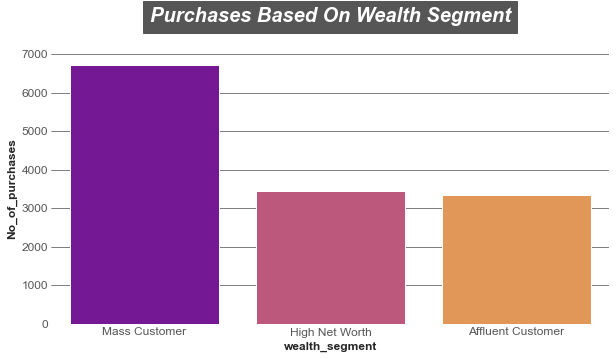

In [36]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='wealth_segment',y='No_of_purchases',data=ws_purchases,ci=95,ax=ax,
           order = ws_purchases.sort_values('No_of_purchases',  ascending = False).wealth_segment, palette = 'plasma')
ax.set_title('Purchases Based On Wealth Segment',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('wealth_segment',weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.savefig('wealth_segment_purchases.png')

plt.show()

Almost half of the total purchases made from the company were made by **Mass Customers** 

## Purchases Based On Property Valuation

In [37]:
pv_purchases = kpmg['transaction_id'].groupby(kpmg['property_valuation']).count().reset_index()
pv_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
pv_purchases = pv_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
pv_purchases['percent'] = pv_purchases.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)
pv_purchases

,property_valuation,No_of_purchases,percent
0,9.0,2274,16.859431
1,8.0,2245,16.644425
2,10.0,1842,13.656584
3,7.0,1530,11.343416
4,11.0,953,7.065540
5,5.0,805,5.968268
6,6.0,790,5.857058
7,4.0,775,5.745848
8,12.0,634,4.700474
9,3.0,568,4.211151


## A Bar Chart On Purchases By Property Valuation

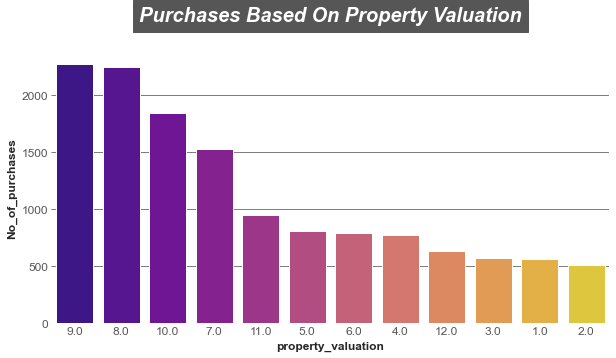

In [38]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='property_valuation',y='No_of_purchases',data=pv_purchases,ci=95,ax=ax,
           order = pv_purchases.sort_values('No_of_purchases',  ascending = False).property_valuation, palette = 'plasma')
ax.set_title('Purchases Based On Property Valuation',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('property_valuation',weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.savefig('property_valuation_purchases.png')

plt.show()

Based on the property valuation of the company's customers, we can see after analysis and visualization, that customers with a property valuation of **9.0, 8.0, 10.0, and 7.0 accounts for 16.85, 16.64, 13.65, 11.34 percent of purchases respectively**, only customers with these listed property valuation **bought over 50 percent of the company's bicyles**. Customers with the highest property valuation of **12.0 and 11.0** occupy the bottom position of purchase made alongside customers with the property valuation **1.0, 2.0, 3,0, 4,0, 5,0, 6,0.**

**So, this clearly means that having the highest value of property(12.0 and 11.0) does not really imply having the highest number of transactions with the company.**

## Purchases Based On Past 3 Years Bike Related Purchases

In [41]:
rp_purchases = kpmg['transaction_id'].groupby(kpmg['3_years_bike_related_purchases_strength']).count().reset_index()
rp_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
rp_purchases = rp_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
rp_purchases['percent'] = rp_purchases.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)
rp_purchases

,3_years_bike_related_purchases_strength,No_of_purchases,percent
0,Weak,2855,21.166963
1,Strong,2706,20.062278
2,Average,2703,20.040036
3,Excellent,2628,19.483986
4,Very Weak,2596,19.246738


## A Bar Chart On Purchases By Past 3 Years Bike Related Purchases

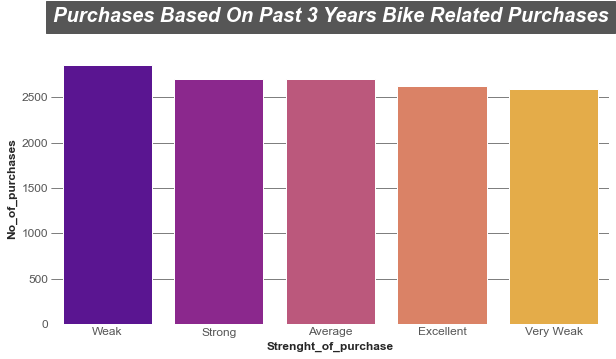

In [45]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='3_years_bike_related_purchases_strength',y='No_of_purchases',data=rp_purchases,ci=95,ax=ax,
           order = rp_purchases.sort_values('No_of_purchases',  ascending = False)['3_years_bike_related_purchases_strength'], palette = 'plasma')
ax.set_title('Purchases Based On Past 3 Years Bike Related Purchases',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('Strenght_of_purchase',weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.savefig('Strenght_of_purchase.png')

plt.show()

In the last three years our customers have made purchases that are related to bicycles, and I attempt at putting these purchases into 5 segments, which would help in our analysis.
The last three years related bicycle purchases segments;

**0-19** as **Very Weak**, 

**20-39** as **Weak**,

**40-59** as **Average**, 

**60-79** as **Strong**, 

**80-99** as **Excellent**.

Prior to this analysis we can easily come to a conclusion that customers with Excelent bicycle related purchases should clearly have more bicycle purchases compared to other segments, especially the Very Weak and Weak segments. But that is totally a wrong assumption, as going by our analysis from our presented data we can accurately deduce that customers in the Weak segment top the chart, followed closely by the customers in the Strong Segment, then Average, Excellent and Very Weak also follow closely respectively.\

Each Segment slightly edges over eachother in number of purchases as there is just a **259 difference** in number of purchases between the first and the last segment in our analysis.

**So, this is a very important aspect for the company. they should not focus on marketing and advertising to customers, especially new customers based on their past three years of bicycle related purchases. But they should target all segments equally to avoid a loss.**

# Purchases Based On Age Generations

In [46]:
generations_purchases = kpmg['transaction_id'].groupby(kpmg['age_generations']).count().reset_index()
generations_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
generations_purchases = generations_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
generations_purchases['percent'] = generations_purchases.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)
generations_purchases

,age_generations,No_of_purchases,percent
0,Millenials,5166,38.300712
1,Gen X,4693,34.793891
2,Gen Z,2014,14.931791
3,Boomers II,1588,11.773428
4,Post War,15,0.111210
5,Boomers I,12,0.088968


## A Bar Chart On Purchases By Age Generations

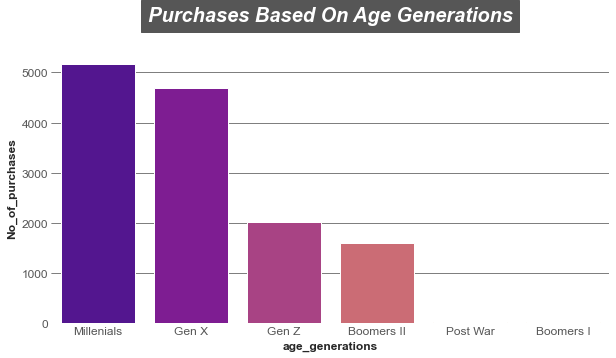

In [47]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='age_generations',y='No_of_purchases',data=generations_purchases,ci=95,ax=ax,
           order = generations_purchases.sort_values('No_of_purchases',  ascending = False).age_generations, palette = 'plasma')
ax.set_title('Purchases Based On Age Generations',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('age_generations',weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.savefig('age_generations.png')

plt.show()

To get a proper insight into the age of the company's customers we would be grouping  customers age into different segments.
These segments would be based on different age generations:

**10-24** as **Gen Z**,

**25-40** as **Millenials**,

**41-56** as **Gen X**,

**57-66** as **Boomers II**,

**67-75** as **Boomers I**,

**76-93** as **Post War**.

Millenials(**25-40**) and Gen X (**41-56**) accounts for over half of the bicycle purchases made from the company. So, this implies that customers in these age brackets bought more bicycles from the company under the year of review.

## Purchases By Car Owners

In [48]:
car_owners_purchases = kpmg['transaction_id'].groupby(kpmg['owns_car']).count().reset_index()
car_owners_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
car_owners_purchases = car_owners_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
car_owners_purchases['percent'] = car_owners_purchases.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)
car_owners_purchases

,owns_car,No_of_purchases,percent
0,Yes,6834,50.66726
1,No,6654,49.33274


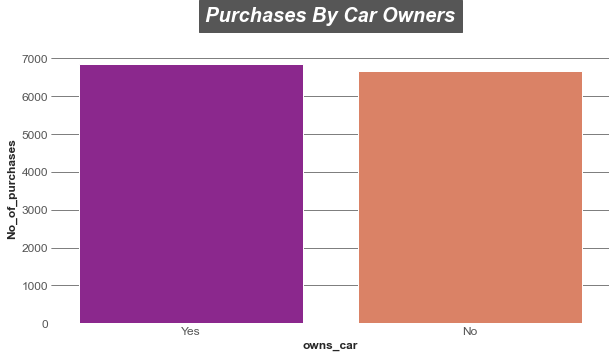

In [49]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='owns_car',y='No_of_purchases',data=car_owners_purchases,ci=95,ax=ax,
           order = car_owners_purchases.sort_values('No_of_purchases',  ascending = False).owns_car, palette = 'plasma')
ax.set_title('Purchases By Car Owners', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('owns_car', weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.savefig('car_owners_purchases.png')

plt.show()

Without analysing this data, those who dont own cars would be considered to have made more bicycle purchases from the company. But that assumpyion is clearly wrong, as our analysis above shows that customers who owns cars slightly edges customers who dont own cars in terms of number of bicycles bought.

So, the company should not target customers based on their ownership of cars. The yardstick for targeting already existing customers or new customers to boostr sales should not be based solely on car ownership.

## Which Brand Sells The Most

In [50]:
brand_count = kpmg['transaction_id'].groupby(kpmg['brand']).count().reset_index()
brand_count.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
brand_count = brand_count.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
brand_count['percent'] = brand_count.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)
brand_count

,brand,No_of_purchases,percent
0,Solex,2916,21.619217
1,Giant Bicycles,2253,16.703737
2,WeareA2B,2200,16.310795
3,OHM Cycles,2075,15.384045
4,Trek Bicycles,2053,15.220937
5,Norco Bicycles,1991,14.761269


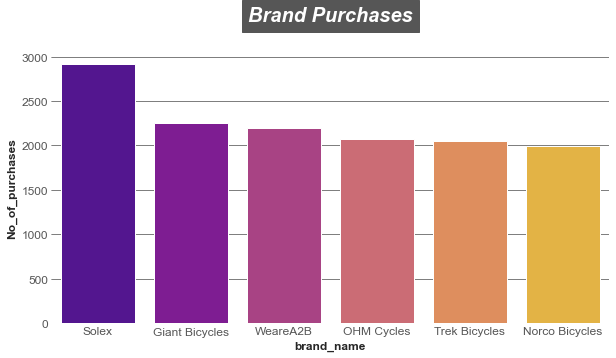

In [51]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='brand',y='No_of_purchases',data=brand_count, ci=95,ax=ax,
           order = brand_count.sort_values('No_of_purchases',  ascending = False).brand, palette = 'plasma')
ax.set_title('Brand Purchases', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('brand_name', weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.savefig('mine2.png')
plt.show()

## Purchases By Month

In [52]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug','Sep','Oct','Nov', 'Dec']

In [53]:
month_count = kpmg['transaction_id'].groupby(kpmg['month']).count().reset_index()
month_count.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
month_count['month'] = pd.Categorical(month_count['month'], categories=months,ordered=True)
month_count['percent'] = month_count.No_of_purchases.apply(lambda x: (x/kpmg.shape[0])*100)
month_count.sort_values('month', inplace = True)
month_count.reset_index(drop = True)

,month,No_of_purchases,percent
0,Jan,1118,8.288849
1,Feb,1124,8.333333
2,Mar,1122,8.318505
3,Apr,1144,8.481613
4,May,1146,8.496441
5,Jun,1052,7.799526
6,Jul,1118,8.288849
7,Aug,1162,8.615065
8,Sep,1050,7.784698
9,Oct,1183,8.770759


<function matplotlib.pyplot.show(close=None, block=None)>

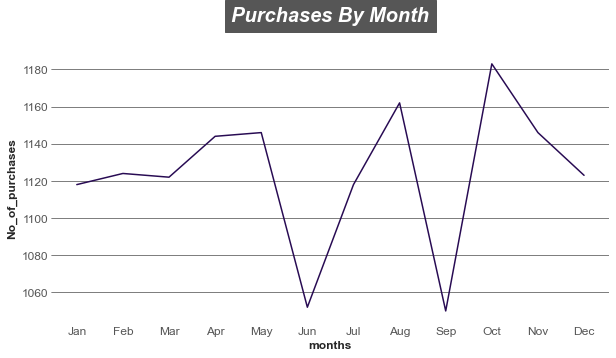

In [54]:
fig,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x='month',y='No_of_purchases',data=month_count, ci=95,ax=ax)
           #order = month_count.sort_values('No_of_purchases',  ascending = False).month, palette = 'plasma')
ax.set_title('Purchases By Month', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('months', weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)


plt.savefig('monthly_purchases.png')
plt.show

**The month of october accounts for the most sales made by the company, and we can see a sharp decline in sales in the month of June and September.**

# Purchases Based On Product Size,Line and Class

## Product Size Purchases

In [55]:
product_size_purchases = kpmg[['transaction_id']].groupby(kpmg['product_size']).count().reset_index()
product_size_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
product_size_purchases = product_size_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
product_size_purchases

,product_size,No_of_purchases
0,medium,8844
1,large,2695
2,small,1949


## Product Line Purchases

In [56]:
product_line_purchases = kpmg[['transaction_id']].groupby(kpmg['product_line']).count().reset_index()
product_line_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
product_line_purchases = product_line_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
product_line_purchases

,product_line,No_of_purchases
0,Standard,9684
1,Road,2722
2,Touring,800
3,Mountain,282


## Product Class Purchases

In [57]:
product_class_purchases = kpmg[['transaction_id']].groupby(kpmg['product_class']).count().reset_index()
product_class_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
product_class_purchases = product_class_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)
product_class_purchases

,product_class,No_of_purchases
0,medium,9385
1,high,2089
2,low,2014


# Model Development

## RFM ANALYSIS

**What is RFM analysis?**

RFM stands for **recency, frequency, monetary** value. In business analytics, we often use this
concept to divide customers into different segments, like high-value customers, medium value
customers or low-value customers, and similarly many others. 

Furthermore, RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency, and monetary total of their transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer a numerical scores based on these factors to provide an objective analyis .  RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

So, we are adopting this model to identify the company's best customers, by measuring and analysing spending habits.

The RFM model is based on three quantitative factors:                                                                           
1.**Recency**: How recently has the customer made a transaction with us.                                                       
2.**Frequency**: How frequent is the customer in ordering/buying some product from us                                           
3.**Monetary**:How much does the customer spend on purchasing products from us

## Calculating Recency

### Here we are calculating recency for customers who had made a purchase with the company

In [58]:
#Getting the most recent date every customer made atransaction with the company

recency = kpmg['transaction_date'].groupby(kpmg['customer_id']).max().reset_index()
recency.rename(columns = {'transaction_date':'last_transaction_date'}, inplace = True)
recency.last_transaction_date = pd.to_datetime(recency['last_transaction_date'])

In [59]:
#Checking out the latest date a transaction was made with the company

latest_date = recency.last_transaction_date.max()
latest_date

Timestamp('2017-12-30 00:00:00')

In [60]:
#Subtracting the latest transaction date with the company from every customers last transaction date with the company

recency['recency'] = recency['last_transaction_date'].apply(lambda x: (latest_date - x).days)

In [61]:
# The 'recency' column below shows how recent(in number of days) a customer made a purchase

recency

,customer_id,last_transaction_date,recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,9,2017-10-13,78
3,12,2017-10-24,67
4,13,2017-12-03,27
...,...,...,...
2438,3493,2017-09-28,93
2439,3494,2017-12-26,4
2440,3495,2017-12-17,13
2441,3496,2017-04-18,256


## Calculating Frequency

### We are calculating the frequency of frequent transactions of the customers in purchasing from the company

In [62]:
#Verifying no duplicates in terms of customers and transactions in our dataset

transactions.duplicated(['transaction_id','customer_id']).sum()

0

In [63]:
#customers and the number of times they have purchased from the company

freq = kpmg['transaction_id'].groupby(kpmg['customer_id']).count().reset_index()
freq.rename(columns={'transaction_id':'frequency'}, inplace = True)
freq

,customer_id,frequency
0,1,11
1,2,3
2,9,6
3,12,7
4,13,7
...,...,...
2438,3493,6
2439,3494,4
2440,3495,7
2441,3496,4


## Calculating Monetary Value

### Here we are calculating the monetary value of customer spent on purchasing products from the company

In [64]:
#The total list price of all the purchases made by every customr

money = kpmg['list_price'].groupby(kpmg['customer_id']).sum().reset_index()
money.rename(columns= {'list_price': 'monetary'}, inplace = True)
money

,customer_id,monetary
0,1,9084.45
1,2,4149.07
2,9,5357.55
3,12,6394.21
4,13,7734.74
...,...,...
2438,3493,10053.82
2439,3494,5122.71
2440,3495,8626.65
2441,3496,4725.38


## Merging All Three Columns In One Dataframe

### Here we are merging all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value

In [65]:
rf = pd.merge(recency,freq, on='customer_id')
rfm = pd.merge(rf,money, on='customer_id')
del rfm['last_transaction_date']
rfm

,customer_id,recency,frequency,monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,9,78,6,5357.55
3,12,67,7,6394.21
4,13,27,7,7734.74
...,...,...,...,...
2438,3493,93,6,10053.82
2439,3494,4,4,5122.71
2440,3495,13,7,8626.65
2441,3496,256,4,4725.38


## Ranking Customer’s Based Upon Their Recency, Frequency, And Monetary Score

In [66]:
#We would be ranking the recency score in descending order (i.e, the lower the recency score the higher the rank)
rfm['r_rank'] = rfm['recency'].rank(ascending = False)


#We would be ranking the frequency score in ascending order (i.e, the higher the frequency score the higher the rank)
rfm['f_rank'] = rfm['frequency'].rank (ascending = True)


#We would be ranking the monetary score in ascending order (i.e, the higher the monetary score the higher the rank)
rfm['m_rank'] = rfm['monetary'].rank (ascending = True)

rfm

,customer_id,recency,frequency,monetary,r_rank,f_rank,m_rank
0,1,7,11,9084.45,2190.0,2401.0,2065.0
1,2,128,3,4149.07,342.0,329.0,638.0
2,9,78,6,5357.55,724.5,1489.5,1068.0
3,12,67,7,6394.21,862.5,1840.5,1418.0
4,13,27,7,7734.74,1600.0,1840.5,1785.0
...,...,...,...,...,...,...,...
2438,3493,93,6,10053.82,560.0,1489.5,2197.0
2439,3494,4,4,5122.71,2289.0,666.5,984.0
2440,3495,13,7,8626.65,1981.5,1840.5,1995.0
2441,3496,256,4,4725.38,35.0,666.5,839.0


## Normalizing The Rank

### Here we are normalizing the rank of the customers within the company to analyze the ranking

In [67]:
rfm['r_rank_norm'] = (rfm['r_rank']/rfm['r_rank'].max())*100
rfm['f_rank_norm'] = (rfm['f_rank']/rfm['f_rank'].max())*100
rfm['m_rank_norm'] = (rfm['m_rank']/rfm['m_rank'].max())*100

rfm.drop(rfm.iloc[:,4:7], axis = 1, inplace = True)

rfm

,customer_id,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm
0,1,7,11,9084.45,90.272053,98.300921,84.527221
1,2,128,3,4149.07,14.097279,13.469806,26.115432
2,9,78,6,5357.55,29.863974,60.982600,43.716742
3,12,67,7,6394.21,35.552350,75.353122,58.043389
4,13,27,7,7734.74,65.952185,75.353122,73.065903
...,...,...,...,...,...,...,...
2438,3493,93,6,10053.82,23.083265,60.982600,89.930413
2439,3494,4,4,5122.71,94.352844,27.287615,40.278346
2440,3495,13,7,8626.65,81.677659,75.353122,81.661891
2441,3496,256,4,4725.38,1.442704,27.287615,34.343021


## Calculating RFM Score

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a **scale of 5**. 

**Formula used for calculating rfm score is: 
0.15 * Recency score + 0.28 * Frequency score + 0.57 * Monetary score**

In [68]:
rfm['rfm_score'] = 0.15*rfm['r_rank_norm'] + 0.28*rfm['f_rank_norm'] + 0.57*rfm['m_rank_norm'] 
rfm['rfm_score'] *= 0.05  #converting our rfm score into a scale of 5

rfm

,customer_id,recency,frequency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,rfm_score
0,1,7,11,9084.45,90.272053,98.300921,84.527221,4.462279
1,2,128,3,4149.07,14.097279,13.469806,26.115432,1.038597
2,9,78,6,5357.55,29.863974,60.982600,43.716742,2.323663
3,12,67,7,6394.21,35.552350,75.353122,58.043389,2.975823
4,13,27,7,7734.74,65.952185,75.353122,73.065903,3.631963
...,...,...,...,...,...,...,...,...
2438,3493,93,6,10053.82,23.083265,60.982600,89.930413,3.589898
2439,3494,4,4,5122.71,94.352844,27.287615,40.278346,2.237606
2440,3495,13,7,8626.65,81.677659,75.353122,81.661891,3.994890
2441,3496,256,4,4725.38,1.442704,27.287615,34.343021,1.371623


## Rating Customer Based Upon The RFM Score

rfm score >= 3.75  : High Value Customer

rfm score >= 2.5  : Medium Value Customer

rfm score >= 1.25  : Low Value Customer

rfm score < 1.25  : Lost Value Customer

# Creating the Customer Segment

In [69]:
bin_5 = [0, 1.25, 2.5, 3.75, 5]

score = rfm['rfm_score']

rfms = pd.cut(score, bin_5)

customer_segment = ['Lost Value Customer', 'Low Value Customer', 'Medium Value Customer', 'High Value Customer']

rfm['customer_segment'] = pd.cut(score, bin_5, labels=customer_segment)

rfm = rfm[['customer_id', 'rfm_score', 'customer_segment']]

In [70]:
rfm.head()

,customer_id,rfm_score,customer_segment
0,1,4.462279,High Value Customer
1,2,1.038597,Lost Value Customer
2,9,2.323663,Low Value Customer
3,12,2.975823,Medium Value Customer
4,13,3.631963,Medium Value Customer


## Value Count Of Each Customer Segment

In [71]:
segment_count = rfm['customer_segment'].value_counts().reset_index()

segment_count = segment_count.rename(columns={'index':'customer_segment', 'customer_segment': 'Num_of_customers'})

segment_count

,customer_segment,Num_of_customers
0,Medium Value Customer,721
1,Low Value Customer,720
2,High Value Customer,504
3,Lost Value Customer,498


## Merging Our Customer Segment With Our Kpmg Dataset

In [121]:
rfm_analysis = pd.merge(rfm,kpmg, on='customer_id', how = 'right')
rfm_analysis.head()

,customer_id,rfm_score,customer_segment,transaction_id,product_id,transaction_date,month,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,profit,full_name,gender,past_3_years_bike_related_purchases,3_years_bike_related_purchases_strength,age,age_generations,job_title,job_industry_category,wealth_segment,owns_car,state,property_valuation
0,2950,0.573166,Lost Value Customer,1,2,2017-02-25,Feb,No,Solex,Standard,medium,medium,71.49,53.62,17.87,Kristos Anthony,Male,19.0,Very Weak,62,Boomers II,Software Engineer I,Financial Services,Mass Customer,Yes,VIC,6.0
1,3120,3.562265,Medium Value Customer,2,3,2017-05-21,May,Yes,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,Lauree O'Donnell,Female,89.0,Excellent,38,Millenials,Clinical Specialist,Health,Mass Customer,Yes,NSW,5.0
2,402,3.359105,Medium Value Customer,3,37,2017-10-16,Oct,No,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,Berne Donegan,Male,9.0,Very Weak,40,Millenials,Desktop Support Technician,Retail,Affluent Customer,No,NSW,1.0
3,3135,3.194684,Medium Value Customer,4,88,2017-08-31,Aug,No,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,Titus Worsall,Male,83.0,Excellent,55,Gen X,Staff Scientist,Financial Services,Mass Customer,No,NSW,10.0
4,2339,3.517310,Medium Value Customer,6,25,2017-03-08,Mar,Yes,Giant Bicycles,Road,medium,medium,1538.99,829.65,709.34,Damien Haddeston,Male,3.0,Very Weak,59,Boomers II,Web Designer II,Property,Affluent Customer,Yes,NSW,10.0


In [122]:
rfm_analysis

,customer_id,rfm_score,customer_segment,transaction_id,product_id,transaction_date,month,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,profit,full_name,gender,past_3_years_bike_related_purchases,3_years_bike_related_purchases_strength,age,age_generations,job_title,job_industry_category,wealth_segment,owns_car,state,property_valuation
0,2950,0.573166,Lost Value Customer,1,2,2017-02-25,Feb,No,Solex,Standard,medium,medium,71.49,53.62,17.87,Kristos Anthony,Male,19.0,Very Weak,62,Boomers II,Software Engineer I,Financial Services,Mass Customer,Yes,VIC,6.0
1,3120,3.562265,Medium Value Customer,2,3,2017-05-21,May,Yes,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,Lauree O'Donnell,Female,89.0,Excellent,38,Millenials,Clinical Specialist,Health,Mass Customer,Yes,NSW,5.0
2,402,3.359105,Medium Value Customer,3,37,2017-10-16,Oct,No,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,Berne Donegan,Male,9.0,Very Weak,40,Millenials,Desktop Support Technician,Retail,Affluent Customer,No,NSW,1.0
3,3135,3.194684,Medium Value Customer,4,88,2017-08-31,Aug,No,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,Titus Worsall,Male,83.0,Excellent,55,Gen X,Staff Scientist,Financial Services,Mass Customer,No,NSW,10.0
4,2339,3.517310,Medium Value Customer,6,25,2017-03-08,Mar,Yes,Giant Bicycles,Road,medium,medium,1538.99,829.65,709.34,Damien Haddeston,Male,3.0,Very Weak,59,Boomers II,Web Designer II,Property,Affluent Customer,Yes,NSW,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,718,3.423592,Medium Value Customer,19995,9,2017-05-13,May,Yes,OHM Cycles,Road,medium,medium,742.54,667.40,75.14,Cathe Lorriman,Female,38.0,Weak,39,Millenials,Engineer I,Manufacturing,Mass Customer,Yes,QLD,11.0
13484,1018,2.683235,Medium Value Customer,19996,51,2017-06-24,Jun,Yes,OHM Cycles,Standard,high,medium,2005.66,1203.40,802.26,Matthiew Ferreras,Male,1.0,Very Weak,23,Gen Z,Help Desk Operator,Manufacturing,Mass Customer,Yes,VIC,10.0
13485,127,4.422046,High Value Customer,19997,41,2017-11-09,Nov,Yes,Solex,Road,medium,medium,416.98,312.74,104.24,Merrili Whitear,Female,81.0,Excellent,43,Gen X,Compensation Analyst,Financial Services,Mass Customer,No,QLD,1.0
13486,2284,3.531688,Medium Value Customer,19998,87,2017-04-14,Apr,Yes,OHM Cycles,Standard,medium,medium,1636.90,44.71,1592.19,Ola Lenoir,Female,83.0,Excellent,43,Gen X,Staff Accountant IV,Telecommunications,High Net Worth,No,VIC,1.0


### Saving The Dataset For Further Visualization

In [123]:
rfm_analysis.to_excel('kpmg_for_tableau.xlsx', index = False)

### Selecting The Necessary Columns For Our analysis

In [91]:
rfm_analysis=rfm_analysis[['customer_id', 'rfm_score', 'customer_segment', 'transaction_id',
       'product_id', 'online_order', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'profit', 'full_name', 'gender',
       'past_3_years_bike_related_purchases', '3_years_bike_related_purchases_strength',
       'age', 'age_generations', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'state', 'property_valuation']]

## Number Of Purchases Made By Each Customer Segment

In [74]:
cs_purchases = rfm_analysis['transaction_id'].groupby(rfm_analysis['customer_segment']).count().reset_index()
cs_purchases.rename(columns={'transaction_id':'No_of_purchases'}, inplace=True)
cs_purchases = cs_purchases.sort_values('No_of_purchases', ascending = False).reset_index(drop=True)

cs_purchases

,customer_segment,No_of_purchases
0,Medium Value Customer,4487
1,High Value Customer,4335
2,Low Value Customer,3286
3,Lost Value Customer,1380


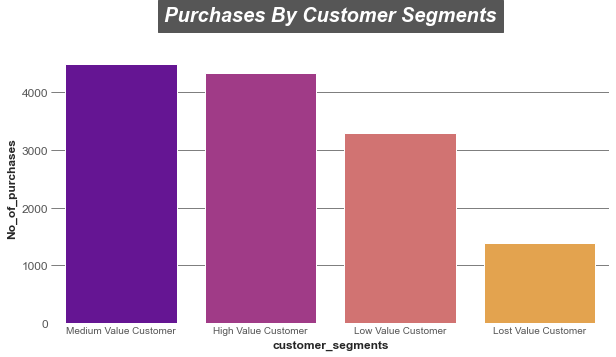

In [75]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='customer_segment',y='No_of_purchases',data=cs_purchases,ci=95,ax=ax,
           order = cs_purchases.sort_values('No_of_purchases',  ascending = False).customer_segment, palette = 'plasma')
ax.set_title('Purchases By Customer Segments', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)


ax.yaxis.grid(linewidth=0.5,color='black')

ax.set_axisbelow(True)


ax.set_xlabel('customer_segments', weight='bold',size=12)
ax.set_ylabel('No_of_purchases',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)


plt.show()

### Profit Made By Each Customer Segment And Average Profit Per Customer In Each Segment

In [76]:
cs_profit = rfm_analysis['profit'].groupby(rfm_analysis['customer_segment']).sum().reset_index()
cs_profit = cs_profit.sort_values('profit', ascending = False).reset_index(drop=True)

cs_profit = pd.merge(cs_profit, segment_count, on = 'customer_segment')


cs_profit['avg_profit'] = cs_profit['profit']/cs_profit.Num_of_customers

cs_profit

,customer_segment,profit,Num_of_customers,avg_profit
0,High Value Customer,2634039.82,504,5226.269484
1,Medium Value Customer,2543112.64,721,3527.201997
2,Low Value Customer,1672743.92,720,2323.255444
3,Lost Value Customer,591499.77,498,1187.750542


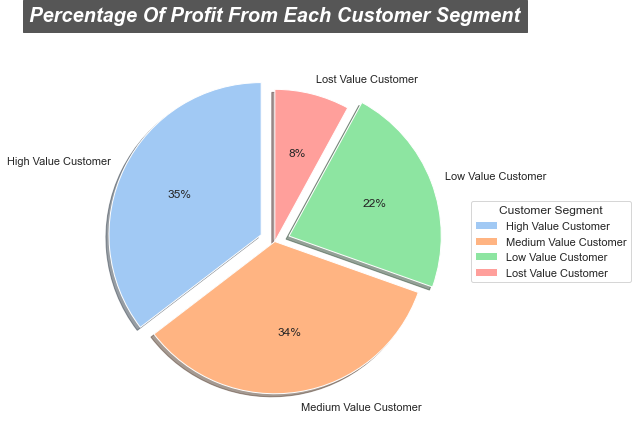

In [77]:
explode = (0.1,0,0.1,0)

colors = sns.color_palette('pastel')[0:4]

fig,ax = plt.subplots(figsize=(10,7))

plt.pie(cs_profit['profit'], labels= cs_profit['customer_segment'], autopct='%.0f%%',
        colors = colors,
        explode = explode,
       shadow = True,
       startangle = 90)

ax.set_title('Percentage Of Profit From Each Customer Segment', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.legend(title='Customer Segment',
         loc='center left',
         bbox_to_anchor=(1,0,0.5,1))

plt.savefig('customer_segment_profit.png')

plt.show()

The company's high value customers provide more profits for the company compared to other customer segments, But the high value customers slightly edges the medium value customers in terms of profits generated for the company. As shown on the chart above

**35 percent of the company's profit comes from the high value customers**, while,                                             
**34 percernt of the company's profit comes from the medium value customers.**


## Average Profit Per Customer In Each Customer Segment

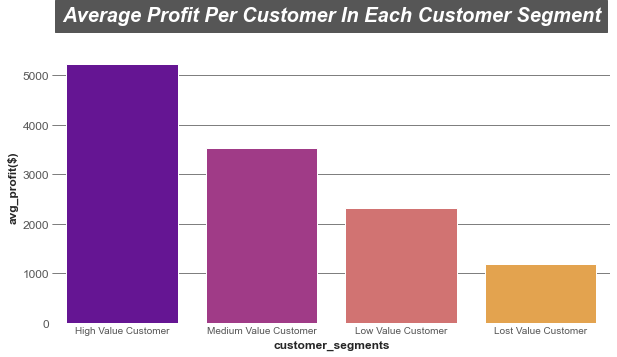

In [78]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='customer_segment',y='avg_profit',data=cs_profit,ci=95,ax=ax,
           order = cs_profit.sort_values('avg_profit',  ascending = False).customer_segment, palette = 'plasma')
ax.set_title('Average Profit Per Customer In Each Customer Segment', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('customer_segments', weight='bold',size=12)
ax.set_ylabel('avg_profit($)',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

plt.savefig('per_customer_profit_in_each_segment.png')

plt.show()

On Average, The company makes above 5000 profit for every purchase made by high value customers, This is very much high compared to other customer segments.                                                                                          
As only a little bit above 3500 profit per customer comes from the medium value customer segment;                               
While the low value customer and lost value customer put together on an average would still give the company less amount of profit per customer compared to high value customer segment.

## Sprocket Central Pty Ltd High Value Customers

In [79]:
#filtering only high value customers from our dataset

high = rfm_analysis[rfm_analysis['customer_segment']=='High Value Customer']
                    
high.head()                    

,customer_id,rfm_score,customer_segment,transaction_id,product_id,transaction_date,month,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,profit,full_name,gender,past_3_years_bike_related_purchases,3_years_bike_related_purchases_strength,age,age_generations,job_title,job_industry_category,wealth_segment,owns_car,state,property_valuation
6,2459,4.447035,High Value Customer,8,15,2017-07-15,Jul,No,WeareA2B,Standard,medium,medium,1292.84,13.44,1279.40,Jeanna Naulls,Female,67.0,Strong,31,Millenials,Quality Engineer,Manufacturing,High Net Worth,No,QLD,6.0
8,3262,4.626814,High Value Customer,10,12,2017-08-30,Aug,Yes,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55,Maynord L'Episcopi,Male,65.0,Strong,58,Boomers II,Product Engineer,Entertainment,Mass Customer,No,QLD,8.0
9,2783,4.012826,High Value Customer,12,61,2017-01-05,Jan,Yes,OHM Cycles,Standard,low,medium,71.16,56.93,14.23,Antonin Gleaves,Male,14.0,Very Weak,39,Millenials,Sales Representative,Retail,Affluent Customer,Yes,NSW,9.0
10,1243,3.909465,High Value Customer,13,35,2017-02-26,Feb,Yes,Trek Bicycles,Standard,low,medium,1057.51,154.40,903.11,Robbert Blakey,Male,73.0,Strong,64,Boomers II,Research Assistant II,Retail,Mass Customer,No,NSW,11.0
11,2717,4.238055,High Value Customer,14,16,2017-09-10,Sep,No,Norco Bicycles,Standard,high,small,1661.92,1479.11,182.81,Frederic McGown,Male,31.0,Weak,36,Millenials,Registered Nurse,Health,Mass Customer,No,NSW,5.0


## How Many High Value Customers Does The Company Have?

In [80]:
print (f'The company has about {high.customer_id.nunique()} high value customers.')

The company has about 504 high value customers.


## Data Insight into The Company's High Level Customers

This insight would help the marketing the team at Sprocket Central Pty Ltd to understand the trends and behaviour of the high level customers of the company and which could help optimise resource allocation for targeted marketing. 

Furthermore, it is based on this insight I would be recommending which of the company's 1000 new customers should be targeted to drive the most value for the organisation.

In [81]:
hc_no_dup = high.drop_duplicates(['customer_id']) # dropping all duplicates customer id

## High Value Customers By State

In [82]:
hc_state = hc_no_dup['customer_id'].groupby(hc_no_dup['state']).count().reset_index()
hc_state

,state,customer_id
0,NSW,252
1,QLD,117
2,VIC,135


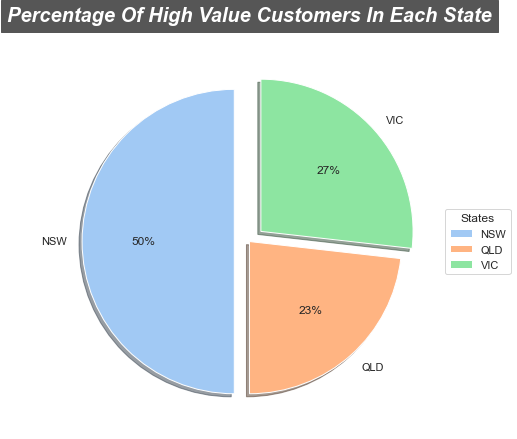

In [83]:
explode = (0.1,0,0.1)

colors = sns.color_palette('pastel')[0:3]

fig,ax = plt.subplots(figsize=(10,7))

plt.pie(hc_state['customer_id'], labels= hc_state['state'], autopct='%.0f%%',
        colors = colors,
        explode = explode,
       shadow = True,
       startangle = 90)

ax.set_title('Percentage Of High Value Customers In Each State', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.legend(title='States',
         loc='center left',
         bbox_to_anchor=(1,0,0.5,1))

plt.savefig('high_value_customers_per_state.png')

plt.show()

## Gender Analysis Of The High Value Customers

### Gender Count Of Customers

In [84]:
hc_gender = hc_no_dup['customer_id'].groupby(hc_no_dup['gender']).count().reset_index()
hc_gender.rename(columns={'customer_id':'No_of_customers'}, inplace=True)
hc_gender = hc_gender.sort_values('No_of_customers', ascending = False).reset_index(drop=True)
hc_gender['percent'] = hc_gender.No_of_customers.apply(lambda x: (x/hc_no_dup.shape[0])*100)

hc_gender

,gender,No_of_customers,percent
0,Female,255,50.595238
1,Male,249,49.404762


###  Gender Count Across Each State

In [85]:
hc_gender_state = hc_no_dup['customer_id'].groupby([hc_no_dup['state'], hc_no_dup['gender']]).count().reset_index()
hc_gender_state.rename(columns={'customer_id':'No_of_customers'}, inplace=True)
hc_gender_state

,state,gender,No_of_customers
0,NSW,Female,133
1,NSW,Male,119
2,QLD,Female,56
3,QLD,Male,61
4,VIC,Female,66
5,VIC,Male,69


### Visualizing Gender Count Across Each State

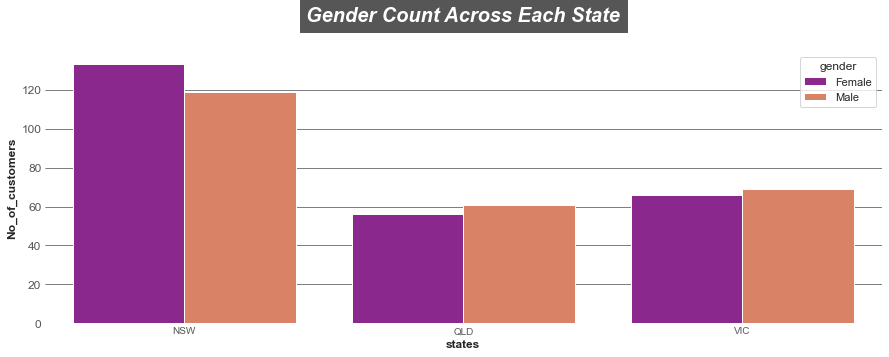

In [86]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='state',y='No_of_customers', hue ='gender', data=hc_gender_state,ci=95,ax=ax, palette = 'plasma')

ax.set_title('Gender Count Across Each State', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)


ax.yaxis.grid(linewidth=0.5,color='black')

ax.set_axisbelow(True)


ax.set_xlabel('states', weight='bold',size=12)
ax.set_ylabel('No_of_customers',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

plt.savefig('gender_count_across_each_state.png')

plt.show()

The company's high level customers is slightly dominated by female customers. If we look at how each gender is represented in each state we would realise that it is only in NSW, the female customers surpasses the male customers, as we can see that the male customers slightly edges over the female customers in the two other states, QLD, and VIC.

In [93]:
hc_car = hc_no_dup['customer_id'].groupby(hc_no_dup['owns_car']).count().reset_index()
hc_car.rename(columns={'customer_id':'No_of_customers'}, inplace=True)
hc_car = hc_car.sort_values('No_of_customers', ascending = False).reset_index(drop=True)
hc_car['percent'] = hc_car.No_of_customers.apply(lambda x: (x/hc_no_dup.shape[0])*100)


hc_car

,owns_car,No_of_customers,percent
0,Yes,258,51.190476
1,No,246,48.809524


# Count of High Value Customers 3 Years Bicyle Related Purchases Into Segment

In [98]:
hc_stren = hc_no_dup['customer_id'].groupby(hc_no_dup['3_years_bike_related_purchases_strength']).count().reset_index()
hc_stren.rename(columns={'customer_id':'No_of_customers'}, inplace=True)
hc_stren = hc_stren.sort_values('No_of_customers', ascending = False).reset_index(drop=True)
hc_stren['percent'] = hc_stren.No_of_customers.apply(lambda x: (x/hc_no_dup.shape[0])*100)


hc_stren

,3_years_bike_related_purchases_strength,No_of_customers,percent
0,Average,112,22.222222
1,Strong,105,20.833333
2,Excellent,99,19.642857
3,Very Weak,97,19.246032
4,Weak,91,18.055556


## Age Generations Of The High Value Customers

In [99]:
hc_age = hc_no_dup['customer_id'].groupby(hc_no_dup['age_generations']).count().reset_index()
hc_age.rename(columns={'customer_id':'No_of_customers'}, inplace=True)
hc_age = hc_age.sort_values('No_of_customers', ascending = False).reset_index(drop=True)
hc_age['percent'] = hc_age.No_of_customers.apply(lambda x: (x/hc_no_dup.shape[0])*100)


hc_age

,age_generations,No_of_customers,percent
0,Millenials,201,39.880952
1,Gen X,174,34.523810
2,Gen Z,75,14.880952
3,Boomers II,53,10.515873
4,Post War,1,0.198413
5,Boomers I,0,0.000000


## Number Of Customers In Each State By Age Generations

In [100]:
hc_stat = hc_no_dup['customer_id'].groupby([hc_no_dup['age_generations'], hc_no_dup['state']]).count().reset_index()
hc_stat.rename(columns={'customer_id':'No_of_customers'}, inplace=True)

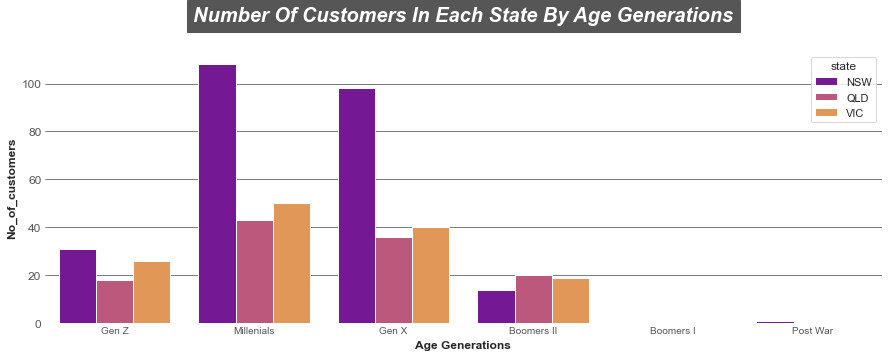

In [101]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='age_generations',y='No_of_customers', hue ='state', data=hc_stat,ci=95,ax=ax, palette = 'plasma')

ax.set_title('Number Of Customers In Each State By Age Generations', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)


ax.yaxis.grid(linewidth=0.5,color='black')

ax.set_axisbelow(True)


ax.set_xlabel('Age Generations', weight='bold',size=12)
ax.set_ylabel('No_of_customers',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

plt.savefig('age_generations_across_each_state.png')

plt.show()

Millenials(age:25-40) and Gen X(age:41-56) accounts for over 50 percent of the company's High Value Customers. So, new customers in this age bracket should be of major interest to the marketing team, and it is also important to know that majority of customers in this age bracket are from New South Wales(NSW).

## Wealth Segment Of High Value Customers

In [102]:
hc_wealth_segment = hc_no_dup['customer_id'].groupby(hc_no_dup['wealth_segment']).count().reset_index()
hc_wealth_segment.rename(columns={'customer_id':'No_of_customers'}, inplace=True)
hc_wealth_segment = hc_wealth_segment.sort_values('No_of_customers', ascending = False).reset_index(drop=True)
hc_wealth_segment['percent'] = hc_wealth_segment.No_of_customers.apply(lambda x: (x/hc_no_dup.shape[0])*100)


hc_wealth_segment

,wealth_segment,No_of_customers,percent
0,Mass Customer,254,50.396825
1,High Net Worth,126,25.000000
2,Affluent Customer,124,24.603175


## Job Industry Analysis

In [103]:
hc_industry = hc_no_dup['customer_id'].groupby([hc_no_dup['job_industry_category']]).count().reset_index()
hc_industry.rename(columns={'customer_id':'No_of_customers'}, inplace=True)
hc_industry = hc_industry.sort_values('No_of_customers', ascending = False).reset_index(drop=True)
hc_industry['percent'] = hc_industry.No_of_customers.apply(lambda x: (x/hc_no_dup.shape[0])*100)


hc_industry

,job_industry_category,No_of_customers,percent
0,Financial Services,118,23.412698
1,Manufacturing,114,22.619048
2,Health,104,20.634921
3,Retail,62,12.301587
4,Property,37,7.341270
5,Entertainment,25,4.960317
6,IT,17,3.373016
7,Argiculture,15,2.976190
8,Telecommunications,12,2.380952


### High Value Customer Gender Count By Job Industry

In [104]:
hc_job_gender = hc_no_dup['customer_id'].groupby([hc_no_dup['job_industry_category'], hc_no_dup['gender']]).count().reset_index()
hc_job_gender.rename(columns={'customer_id':'No_of_customers'}, inplace=True)

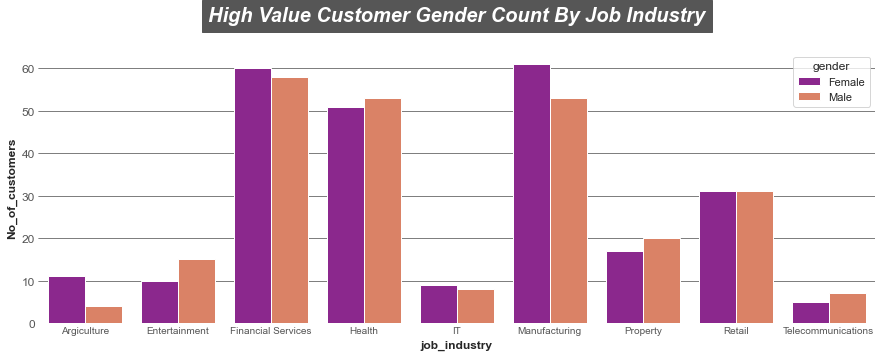

In [105]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='job_industry_category',y='No_of_customers', hue ='gender', data=hc_job_gender,ci=95,ax=ax, palette = 'plasma')

ax.set_title('High Value Customer Gender Count By Job Industry', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)


ax.yaxis.grid(linewidth=0.5,color='black')

ax.set_axisbelow(True)


ax.set_xlabel('job_industry', weight='bold',size=12)
ax.set_ylabel('No_of_customers',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

plt.savefig('gender_count_across_job_industry.png')

plt.show()

### High Value Customers Car Ownership By Their Job Industry

In [106]:
hc_owns_car = hc_no_dup['customer_id'].groupby([hc_no_dup['job_industry_category'], hc_no_dup['owns_car']]).count().reset_index()
hc_owns_car.rename(columns={'customer_id':'No_of_customers'}, inplace=True)

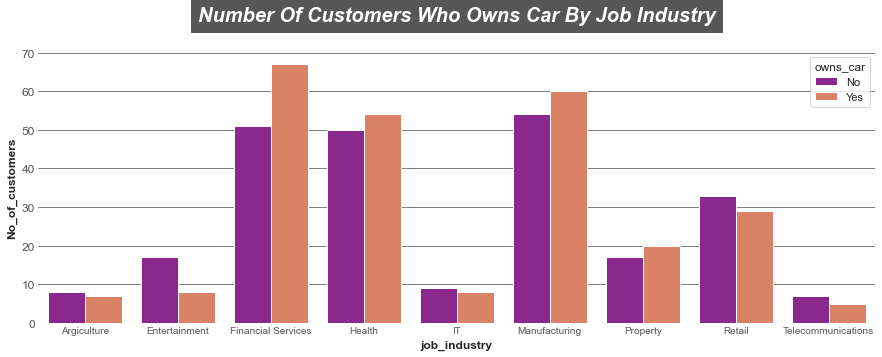

In [107]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='job_industry_category',y='No_of_customers', hue ='owns_car', data=hc_owns_car,ci=95,ax=ax, palette = 'plasma')

ax.set_title('Number Of Customers Who Owns Car By Job Industry', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)


ax.yaxis.grid(linewidth=0.5,color='black')

ax.set_axisbelow(True)


ax.set_xlabel('job_industry', weight='bold',size=12)
ax.set_ylabel('No_of_customers',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

plt.savefig('car_ownership_across_job_industry.png')

plt.show()

### Number Of Customers In Each Wealth Segment By Job Industry

In [108]:
hc_ws = hc_no_dup['customer_id'].groupby([hc_no_dup['job_industry_category'], hc_no_dup['wealth_segment']]).count().reset_index()
hc_ws.rename(columns={'customer_id':'No_of_customers'}, inplace=True)

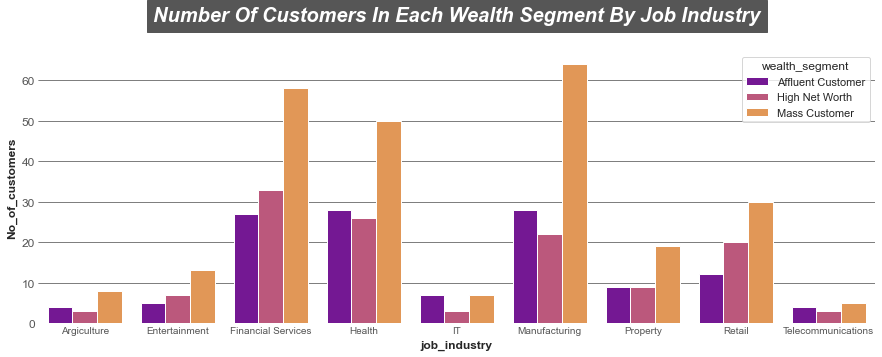

In [109]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='job_industry_category',y='No_of_customers', hue ='wealth_segment', data=hc_ws,ci=95,ax=ax, palette = 'plasma')

ax.set_title('Number Of Customers In Each Wealth Segment By Job Industry', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)


ax.yaxis.grid(linewidth=0.5,color='black')

ax.set_axisbelow(True)


ax.set_xlabel('job_industry', weight='bold',size=12)
ax.set_ylabel('No_of_customers',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

plt.savefig('wealth_segment_across_each_state.png')

plt.show()

### Number Of Customers In Each State By Job Industry

In [110]:
hc_state = hc_no_dup['customer_id'].groupby([hc_no_dup['job_industry_category'], hc_no_dup['state']]).count().reset_index()
hc_state.rename(columns={'customer_id':'No_of_customers'}, inplace=True)

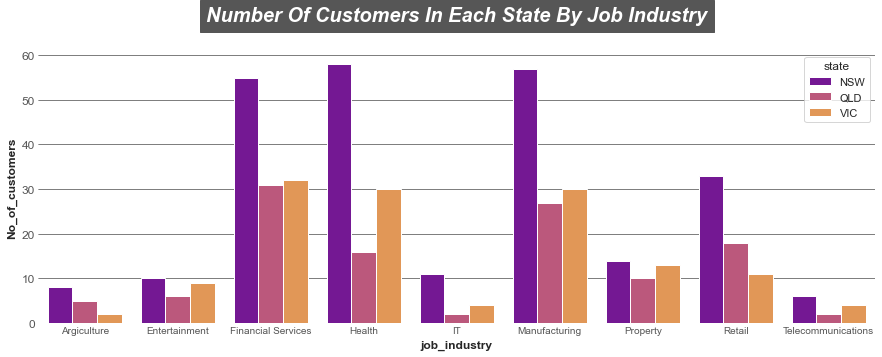

In [111]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x='job_industry_category',y='No_of_customers', hue ='state', data=hc_state,ci=95,ax=ax, palette = 'plasma')

ax.set_title('Number Of Customers In Each State By Job Industry', backgroundcolor ='#565656', 
             fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)


ax.yaxis.grid(linewidth=0.5,color='black')

ax.set_axisbelow(True)


ax.set_xlabel('job_industry', weight='bold',size=12)
ax.set_ylabel('No_of_customers',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 10)
plt.yticks(color='#565656', size = 12)

plt.savefig('state_customer_count_across_each_job_industry.png')

plt.show()

Financial Services, Manufacturing, and Health industries accounts for Over a 60 percent of the company's high value customers when put together. These are three important job industry categories The company should pay a close attention to.

Further insight into these three job industries as shown above through various charts, we discover that majority of these customers in these industries are from NSW, fall under Masss Customers wealth segment, and they also do own cars. in terms of gender across these three job industries it's really a close one, with the female customers edging it out in Financial Services, Manufacturing, while the male customers edged it out in the Health sector.

## High Value Customers Based On Property Valuation

In [112]:
hc_pv = hc_no_dup['customer_id'].groupby(hc_no_dup['property_valuation']).count().reset_index()
hc_pv.rename(columns={'customer_id':'No_of_customers'}, inplace=True)
hc_pv = hc_pv.sort_values('No_of_customers', ascending = False).reset_index(drop=True)
hc_pv['percent'] = hc_pv.No_of_customers.apply(lambda x: (x/hc_no_dup.shape[0])*100)


hc_pv

,property_valuation,No_of_customers,percent
0,8.0,89,17.658730
1,9.0,87,17.261905
2,10.0,70,13.888889
3,7.0,47,9.325397
4,4.0,36,7.142857
5,11.0,36,7.142857
6,5.0,32,6.349206
7,6.0,26,5.158730
8,2.0,24,4.761905
9,3.0,20,3.968254


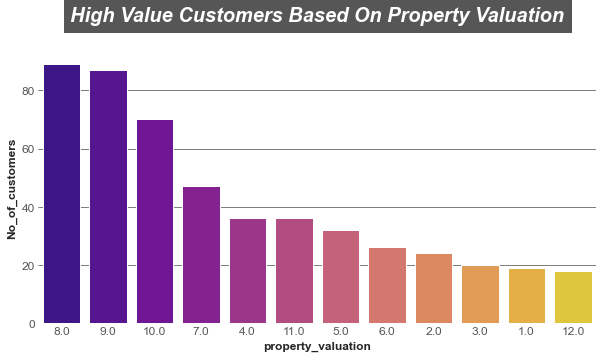

In [113]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='property_valuation',y='No_of_customers',data=hc_pv,ci=95,ax=ax,
           order = hc_pv.sort_values('No_of_customers',  ascending = False).property_valuation, palette = 'plasma')
ax.set_title('High Value Customers Based On Property Valuation',backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)

ax.tick_params(labelsize=16,length=0)
plt.box(False)
# add grid lines for y axis
ax.yaxis.grid(linewidth=0.5,color='black')
# put the grid lines below bars
ax.set_axisbelow(True)
#plt.figure(figsize = (20,3))

ax.set_xlabel('property_valuation',weight='bold',size=12)
ax.set_ylabel('No_of_customers',weight='bold',size=12)


plt.xticks(rotation=360,color='#565656', size = 12)
plt.yticks(color='#565656', size = 12)

plt.savefig('high_value_customers_on_property_valuation.png')



plt.show()

Customers With property valuation of 8.0, 9.0, and 10.0 makes up majority of the high level customers, while we can see that the customers with the most property valuation, 12.0, accounts for the least number of customers in this segment. 

# Interpretation

Based on the data exploration and insight gained from the company's data. We can affirm some key behaviours and attributes of the existing customers, that could play a major role in helping the company target some specific customers from the 1000 new customers to drive the most value for the organisation.

The company should focus on the following:                                                                                     
New customers From **NSW**,

New Customers in any of these job industries **Financial Services, Manufacturing, and Health industries**,

New Customers that falls within this age generations **Millenials (age:25-40) and Gen X (age:41-56)**

New Customers that falls under **Mass Customer** in wealth segment

New Customers with a property valuation of **8.0, or 9.0, or 10.0**                                                           

So, it is based on this recommendation we would be fitering the new customer list, to find customers who meet all criterias listed above.



In [114]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,60,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,47,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,43,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,38,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,52,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


# Data Transformation On Our New Customers Dataset To Meet Our needs

## Creating A Segment For past_3_years_bike_related_purchases

In [115]:
bin_3 = [-1, 19, 39, 59, 79, 99]

related_purchases_3 = new_cust['past_3_years_bike_related_purchases']

bike_related_purchases_3 = pd.cut(related_purchases_3, bin_3)

past_3_yearspurchasing_power_3 = ['Very Weak','Weak', 'Average', 'Strong', 'Excellent']

bike_related_purchases_3 = pd.cut(related_purchases_3, bin_3, labels=past_3_yearspurchasing_power_3)

new_cust.insert(4, '3_years_bike_related_purchases_strength', bike_related_purchases_3)

## Creating A Segment For Age

In [116]:
bin_4 = [9, 24, 40, 56, 66, 75, 93, 99]

generations_4 = new_cust['age']

age_generations = pd.cut(generations_4, bin_4)

age_generations_stage_4 = ['Gen Z', 'Millenials', 'Gen X', 'Boomers II', 'Boomers I', 'Post War', 'WW II']

age_generations_4 = pd.cut(generations_4,bin_4, labels= age_generations_stage_4)

new_cust.insert(7, 'age_generations', age_generations_4)

## Creating A Full Name Column

In [117]:
full_name = new_cust['first_name'] +' '+ new_cust['last_name']
new_cust.insert(0, 'full_name', full_name)
new_cust.drop(new_cust.iloc[: ,1:3], axis=1, inplace=True)  #Dropping  The first and last name column

In [118]:
new_cust.head()

,full_name,gender,past_3_years_bike_related_purchases,3_years_bike_related_purchases_strength,DOB,age,age_generations,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie Brister,Male,86,Excellent,1957-07-12,60,Boomers II,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly Genery,Male,69,Strong,1970-03-22,47,Gen X,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis Forrester,Female,10,Very Weak,1974-08-28,43,Gen X,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine Stutt,Female,64,Strong,1979-01-28,38,Millenials,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda Hadlee,Female,34,Weak,1965-09-21,52,Gen X,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


## Filtering Our New Customers In Search of Possible Valuable Customers

In [119]:
target = new_cust[(new_cust['state'] == 'NSW') &
                  ((new_cust['job_industry_category'] == 'Financial Services') | (new_cust['job_industry_category'] == 'Health') | (new_cust['job_industry_category'] == 'Manufacturing')) &
                    ((new_cust['age_generations'] == 'Millenials') | (new_cust['age_generations'] == 'Gen X')) &
                      (new_cust['wealth_segment'] == 'Mass Customer') &
                           ((new_cust['property_valuation'] == 8.0)|(new_cust['property_valuation'] == 9.0)|(new_cust['property_valuation'] == 10.0))]

target.reset_index(drop=True,inplace=True)

In [120]:
target

,full_name,gender,past_3_years_bike_related_purchases,3_years_bike_related_purchases_strength,DOB,age,age_generations,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Duff Karlowicz,Male,50,Average,1972-04-28,45,Gen X,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.656250
1,Melba Spellacy,Female,38,Weak,1976-12-09,41,Gen X,VP Marketing,Health,Mass Customer,N,No,4,0591 Anzinger Circle,2232,NSW,Australia,10,14,1.593750
2,Teddie Burchill,Male,11,Very Weak,1968-12-21,49,Gen X,Programmer I,Manufacturing,Mass Customer,N,Yes,13,321 Raven Plaza,2161,NSW,Australia,9,21,1.515625
3,Martelle Tuppeny,Female,52,Average,1981-02-03,36,Millenials,Marketing Assistant,Manufacturing,Mass Customer,N,No,9,261 Grayhawk Way,2226,NSW,Australia,10,54,1.381250
4,Tobias Woodhams,Male,0,Very Weak,1961-04-15,56,Gen X,Research Nurse,Health,Mass Customer,N,No,17,4 Valley Edge Plaza,2759,NSW,Australia,9,77,1.341406
5,Chanda Mensler,Female,15,Very Weak,1972-01-14,45,Gen X,Computer Systems Analyst IV,Manufacturing,Mass Customer,N,Yes,13,0 Mockingbird Plaza,2212,NSW,Australia,10,78,1.337500
6,Valerie Pickover,Female,34,Weak,1965-09-08,52,Gen X,Editor,Financial Services,Mass Customer,N,No,9,92214 Spenser Road,2756,NSW,Australia,8,78,1.337500
7,Tyne Coate,Female,82,Excellent,1965-07-15,52,Gen X,Developer II,Manufacturing,Mass Customer,N,No,17,90820 Thackeray Street,2218,NSW,Australia,8,146,1.225000
8,Robert Corkill,Male,55,Average,1976-03-12,41,Gen X,Clinical Specialist,Health,Mass Customer,N,No,4,5612 Toban Point,2227,NSW,Australia,10,166,1.175000
9,Mick Macewan,Male,32,Weak,1967-12-12,50,Gen X,Senior Cost Accountant,Financial Services,Mass Customer,N,No,16,59254 Northland Alley,2032,NSW,Australia,10,206,1.137500


## Selecting Only Necessary Columns For Our Targeted New Customers

In [ ]:
target =target[['full_name','gender','age',
                'job_industry_category', 'wealth_segment',
       'owns_car','state', 'property_valuation']]

In [ ]:
target.head(5)

## How Many New Customers Should The Company Target To Get More Value

In [ ]:
print (f'Out of the available new customers of the company only about {target.shape[0]} customers meets all necessary requirements derived from the\ndata of our existing high value customers.')